In [1]:
# Aishwarya Gupta 07700006172

# Logistic Regression

You will implement logistic regression classifier.

Iris dataset with only 2 classes is provided to test the code.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# read dataset
df = pd.read_csv("shuffled_2class_iris_dataset.csv")
print(df.head())

df = df.values
X = df[:,0:4]   # 100x4
y = df[:,4]     # 100x1

# Zero out the mean
diff = X.max(0) - X.min(0)
X = X - diff

# Create 90/10 trainig/test sets
train_data = X[0:90,0:4]; train_label = y[0:90]
test_data = X[90:100,0:4]; test_label = y[90:100]

Saving shuffled_2class_iris_dataset.csv to shuffled_2class_iris_dataset (1).csv
   sepal_width  sepal_length  petal_width  petal_length  class
0          5.6           3.0          4.1           1.3      0
1          5.4           3.9          1.7           0.4      1
2          5.6           3.0          4.5           1.5      0
3          5.0           3.5          1.6           0.6      1
4          5.5           2.4          3.7           1.0      0


In [3]:
sp = np.ones((len(test_data),1))
test_data = np.concatenate((sp,test_data), axis=1)

np.random.seed(1)

# Plot the cost function as function of epochs

In [4]:
#Run the algorithm for 2000 epochs with the learning rate of 0.01

nu = 0.01
MAX_EPOCHS = 2000
J_vec = []

sp = np.ones((len(train_data),1))
X_train = np.concatenate((sp,train_data), axis=1)
y_train = train_label.reshape(len(train_label),1)

w = np.random.rand(5,1)
w0 = w[0]; w1 = w[1]; w2 = w[2]; w3 = w[3]; w4 = w[4]
N = len(y_train)

# Update thr cost function

# Looping for 2000 epochs
# Training the model over X_train data

for itr in range (0, MAX_EPOCHS):

    for i in range(0,len(X_train)):
        wTx = 1/(1+(np.exp(-(w0*X_train[i][0] + w1*X_train[i][1] + w2*X_train[i][2] + w3*X_train[i][3] + w4*X_train[i][4]))))

        w0 = w0 - nu * (sum((wTx-y_train[i])*X_train[i][0]))/N
        w1 = w1 - nu * (sum((wTx-y_train[i])*X_train[i][1]))/N
        w2 = w2 - nu * (sum((wTx-y_train[i])*X_train[i][2]))/N
        w3 = w3 - nu * (sum((wTx-y_train[i])*X_train[i][3]))/N
        w4 = w4 - nu * (sum((wTx-y_train[i])*X_train[i][4]))/N
# Computing cost function
        J = -(sum((y_train[i]*np.log(wTx))+((1-y_train[i])*np.log(1-wTx))))


# Collecting the cost function result from each epoch value and generate a plot
    J_vec.append(J)


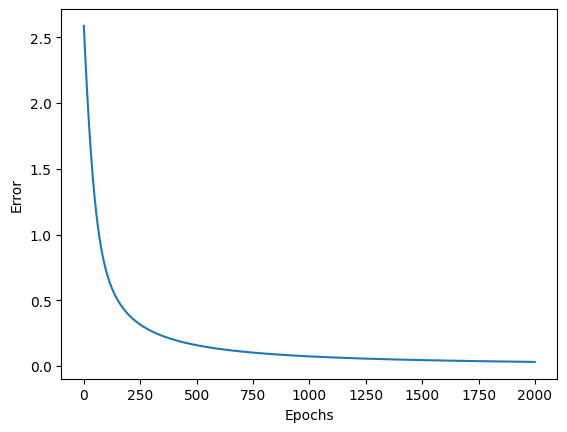

In [5]:
# Plot cost function vs number of epochs graph
plt.plot(J_vec)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Test the model using test set

1.Print the actual and predicted class labels

2.Print the average accuracy

In [6]:
# class counter set to 0
correct_class_cnt = 0

print("The values of y and y_hat")

# for loop to the equation to get output values for the test_data
for i in range (0, len(test_data)):

    wTx = 1/(1+(np.exp(-(w0*test_data[i][0] + w1*test_data[i][1] + w2*test_data[i][2] + w3*test_data[i][3] + w4*test_data[i][4]))))
    # if-else to state the value of output (0/1)
    if wTx <=0.5:
        y_hat = 0.0
    else:
        y_hat = 1.0


# Checking the accuracy

    print('y={}, y_hat={}'.format(test_label[i], y_hat))
    if (y_hat == test_label[i]):
        correct_class_cnt += 1       #update counter

# Print the average accuracy
print('The Average accuracy of the mode is = {0:2f}'.format(correct_class_cnt/10))

The values of y and y_hat
y=1.0, y_hat=1.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
y=0.0, y_hat=0.0
y=0.0, y_hat=0.0
y=0.0, y_hat=0.0
y=1.0, y_hat=1.0
The Average accuracy of the mode is = 1.000000
